Piotr Rzeźnik 402194

### Imports

In [1]:
import itertools
from tqdm.notebook import tqdm
import json
from datasets import load_dataset
from elasticsearch import Elasticsearch


### Load dataset

1. Use the corpus from exercise no. 1 or any other Polish corpus of comparable size. If you use another corpus, make sure it does not contain HTML code.

In [2]:
dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')
pd_dataset = dataset['corpus'].to_pandas()

2. Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.


In [3]:
from spacy.lang.pl import Polish
nlp = Polish()
tokenizer = nlp.tokenizer

In [4]:
pd_dataset.iloc[0]['text']

'Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.'

In [5]:
tokens = tokenizer(pd_dataset.iloc[0]['text'])

In [6]:
len(tokens)

81

3. Compute frequency list for each of the processed files.
4. Aggregate the result to obtain one global frequency list.

In [7]:
from collections import defaultdict
frequency_list = defaultdict(lambda: 0)
texts = pd_dataset['text'].apply(lambda s: s.lower())
for doc in tokenizer.pipe(texts, batch_size=50):
    for token in doc:
        frequency_list[token.text] += 1

In [8]:
frequency_list

defaultdict(<function __main__.<lambda>()>,
            {'nie': 131355,
             'mówię': 977,
             ',': 611388,
             'że': 90021,
             'podoba': 499,
             'mi': 5497,
             'się': 85835,
             'też': 3989,
             'pomysł': 1402,
             'szkolenia': 136,
             'w': 175120,
             'miejscu': 1159,
             'pracy': 7281,
             'ale': 41228,
             'możesz': 23208,
             'oczekiwać': 396,
             'firma': 6276,
             'to': 116324,
             'zrobi': 428,
             '.': 399567,
             'szkolenie': 108,
             'pracowników': 2207,
             'ich': 14567,
             'praca': 1329,
             '–': 8761,
             'oni': 1242,
             'tworzą': 221,
             'oprogramowanie': 459,
             'być': 19261,
             'może': 26331,
             'systemy': 315,
             'edukacyjne': 59,
             'stanach': 1200,
             'zjednoczon

5. Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics). Why do we do this? What are the benefits and drawbacks of choosing the minimum length of 2?

In [9]:
import pandas as pd
pd_frequency_list = pd.DataFrame(frequency_list.items(), columns=['token', 'count'])
pd_frequency_list_filtered = pd_frequency_list[pd_frequency_list['token'].apply(lambda x: len(x)>2)]

In [10]:
pd_frequency_list.shape, pd_frequency_list_filtered.shape

((188516, 2), (187070, 2))

6. Make a plot in a logarithmic scale (for X and Y):
    i. X-axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences
    ii. Y-axis should contain the number of occurrences of the term with given rank.

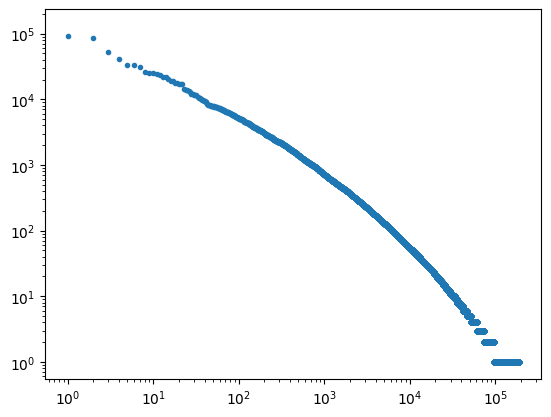

In [11]:
import matplotlib.pyplot as plt

df = pd_frequency_list_filtered.sort_values(by='count', ascending=False).reset_index()
plt.yscale('log')
plt.xscale('log')
plt.plot(df['count'], '.')


7. Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.

In [60]:
from morfeusz2 import Morfeusz

morfeusz = Morfeusz()
words_in_dict = []
words_not_in_dict = []

for text, count in pd_frequency_list_filtered.values:
    analysis = morfeusz.analyse(text)
    if analysis:
        if 'ign' in analysis[0][2]:
            words_not_in_dict.append((text, count))
        else:
            words_in_dict.append((text, count))


In [61]:
len(words_not_in_dict)

42129

In [62]:
pd_words_not_in_dict = pd.DataFrame(words_not_in_dict, columns=['token', 'count'])
pd_words_in_dict = pd.DataFrame(words_in_dict, columns=['token', 'count'])

8. Find 30 words with the highest ranks that do not belong to the dictionary.


In [63]:
highest_values = pd_words_not_in_dict.sort_values(by='count', ascending=False).iloc[:30]
highest_values

,token,count
14,itp,4986
339,etf,1949
42,irs,1945
88,amazon,1522
134,autotldr,1098
167,s&p,984
106,message,909
199,the,900
142,compose,875
240,llc,803


9. Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

In [64]:
random_5_occ = pd_words_not_in_dict[pd_words_not_in_dict['count']==5].sample(n=30)
random_5_occ

,token,count
29630,ged,5
10253,downvote,5
1822,mkc,5
24383,hair,5
24514,virksomhed,5
227,impact,5
16524,20xx,5
12744,irving,5
2489,let's,5
1800,babies,5


10. Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9. (Note: You don't have to apply the distance directly. Any method that is more efficient than scanning the dictionary will be appreciated.)

In [65]:
from Levenshtein import distance
for item in highest_values['token']:
    min_distance = 10000
    best_match = ''
    for text in pd_words_in_dict.sort_values(by='count', ascending=False)['token']:
        current_distance = distance(item, text)
        if current_distance == 1:
            best_match = text
            break
        if current_distance < min_distance:
            min_distance = current_distance
            best_match = text
            
    print(item, best_match)

itp ftp
etf etn
irs ira
amazon amazonie
autotldr /autotldr
s&p sip
message /message
the tle
compose /compose
llc loc
fed red
gbp gap
hsa usa
vanguard jaguara
itd ind
tl;dr l;drs
paypal papa
comments/31b9fm /comments/31b9fm
ipo imo
faq_autotldr_bot/ /faq_autotldr_bot/
walmart wart
faq](http://np.reddit.com q](http://np.reddit.com
sec sep
reddit -reddit/
cpa cia
tl;drs l;drs
yahoo @yahoo
uber ber
mba oba
money monety


In [66]:
for item in random_5_occ['token']:
    min_distance = 10000
    best_match = ''
    for text in pd_words_in_dict.sort_values(by='count', ascending=False)['token']:
        current_distance = distance(item, text)
        if current_distance == 1:
            best_match = text
            break
        if current_distance < min_distance:
            min_distance = current_distance
            best_match = text
            
    print(item, best_match)

ged red
downvote powrotem
mkc móc
hair fair
virksomhed wirusowe
impact import
20xx 200
irving irvine
let's letni
babies bazie
twtr twój
bep bez
edge ode
caveat nawet
iss022 2022
bankrolla bankowa
wikitextbot/ /wikitextbot/
wom dom
round rund
hussman nissan
powerball powell
komentarz&message komentarze
issac issa
immigration 05/immigration
vbr hbr
aux aut
oasis nasi
mine mile
span stan
trường trudno


11. Compare the results of your algorithm and output of ES.


In [70]:
ELASTIC_PASSWORD = 'K2FBY2II7GsKN-bispmT'
client = Elasticsearch(
    "https://localhost:9200",
    ca_certs="../../http_ca.crt",
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

client.info()

ObjectApiResponse({'name': 'c61b6e2c2f19', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'bnr3owq3RoWVA4KK9aXu_Q', 'version': {'number': '8.10.4', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': 'b4a62ac808e886ff032700c391f45f1408b2538c', 'build_date': '2023-10-11T22:04:35.506990650Z', 'build_snapshot': False, 'lucene_version': '9.7.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [72]:
INDEX_NAME = "levenshtein"
client.indices.create(index=INDEX_NAME)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'levenshtein'})

In [81]:
pd_words_in_dict.iloc[0]

token       nie
count    131355
Name: 0, dtype: object

In [86]:
pd_words_in_dict['_id'] = pd_words_in_dict.index

In [88]:
body = list(itertools.chain(*pd_words_in_dict.apply(lambda x: ({'index': {'_id': x._id}}, {'text': x.token}) , axis=1)))
chunk_size = 200
for chunk in tqdm([body[i:i + chunk_size] for i in range(0, len(body), chunk_size)]):
    client.bulk(
        index=INDEX_NAME,
        body=chunk
    )

  0%|          | 0/1450 [00:00<?, ?it/s]

In [115]:
for item in highest_values['token']:
    request_body = {
      "query": {
        "fuzzy": {
          "text": {
            "value": item,
            "fuzziness": 2
          }
        }
      }
    }
    res = client.search(index = INDEX_NAME, body = request_body)
    if res.body['hits']['hits']:
        print(item, res.body['hits']['hits'][0]['_source']['text'])
    else:
        print(item, '--------')

itp itr
etf /etf
irs rocznie).irs
amazon amazonie
autotldr /autotldr
s&p sap
message /message
the .the
compose /compose
llc loc
fed .fed
gbp gap
hsa usa
vanguard --------
itd 60,itd
tl;dr --------
paypal zapal
comments/31b9fm --------
ipo -http://www.w3teachers.com/ipo/ipo-dashboard
faq_autotldr_bot/ /faq_autotldr_bot/
walmart http://politiseek.com/2017/05/procent-pracowników-walmart-na-jedzeniu-
faq](http://np.reddit.com --------
sec sek
reddit //reddit
cpa epa
tl;drs --------
yahoo @yahoo
uber ber
mba oba
money monet


In [117]:
for item in random_5_occ['token']:
    request_body = {
      "query": {
        "fuzzy": {
          "text": {
            "value": item,
            "fuzziness": 2
          }
        }
      }
    }
    res = client.search(index = INDEX_NAME, body = request_body)
    if res.body['hits']['hits']:
        print(item, res.body['hits']['hits'][0]['_source']['text'])
    else:
        print(item, '--------')

ged /ged
downvote --------
mkc moc
hair fair
virksomhed --------
impact impasu
20xx 2015/2016
irving irvine
let's letni
babies baniek
twtr twój
bep bez
edge 20/hedge
caveat --------
iss022 --------
bankrolla --------
wikitextbot/ /wikitextbot
wom dom
round rund
hussman http://www.dw.de/russian-sanctions-create-surplus-of-european-produce/a-17857118
powerball --------
komentarz&message --------
issac issa
immigration 05/immigration
vbr pbr
aux aut
oasis odpis
mine mnie
span stan
trường --------


Dla własnej metody oraz fuzzy search z elasticsearch jest brane pod uwagę pierwsze najbliższe (wg odległości Levenshteina) dopasowanie dla danego słowa nieistniejącego w słowniku. Wydajnościowo wychodzą bardzo podobnie, obie metody wykonały się w około 2s. 